In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = r"C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\train"
TEST_DIR = r"C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test"

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                                   image     label
0      C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
1      C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
2      C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
3      C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
4      C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
...                                                  ...       ...
28704  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
28705  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
28706  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
28707  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
28708  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                                  image     label
0     C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
1     C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
2     C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
3     C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
4     C:\Users\vinay\OneDrive\Desktop\human emotion ...     angry
...                                                 ...       ...
7173  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
7174  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
7175  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
7176  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise
7177  C:\Users\vinay\OneDrive\Desktop\human emotion ...  surprise

[7178 rows x 2 columns]
0       C:\Users\vinay\OneDrive\Desktop\human emotion ...
1       C:\Users\vinay\OneDrive\Desktop\human emotion ...
2       C:\Users\vinay\OneDrive\Desktop\human emotion ...
3       C

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

C:\Users\vinay\OneDrive\Desktop\human emotion detection\test\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\vinay\OneDrive\Desktop\human emotion detection\test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 216s 949ms/step - accuracy: 0.2346 - loss: 1.8388 - val_accuracy: 0.2471 - val_loss: 1.8161
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 218s 971ms/step - accuracy: 0.2519 - loss: 1.8109 - val_accuracy: 0.2549 - val_loss: 1.7933
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 220s 977ms/step - accuracy: 0.2582 - loss: 1.7863 - val_accuracy: 0.2949 - val_loss: 1.7118
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 219s 972ms/step - accuracy: 0.2962 - loss: 1.7160 - val_accuracy: 0.3364 - val_loss: 1.6027
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 219s 972ms/step - accuracy: 0.3533 - loss: 1.6226 - val_accuracy: 0.4323 - val_loss: 1.4843
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 220s 979ms/step - accuracy: 0.4036 - loss: 1.5262 - val_accuracy: 0.4733 - val_loss: 1.3728
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 219s 973ms/step - accuracy: 0.4413 - loss: 1.4553 - val_accuracy: 0.4907 - val_loss: 1.3218
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 220s 976ms/step - accuracy: 

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [13]:
from keras.models import model_from_json
from keras.preprocessing.image import load_img
import numpy as np

# Load the model architecture from JSON file
json_file = open(r"C:\Users\vinay\OneDrive\Desktop\human emotion detection\emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Load the model weights
model.load_weights(r"C:\Users\vinay\OneDrive\Desktop\human emotion detection\emotiondetector.h5")

# Define the emotion labels
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Define the function to preprocess an image
def ef(image):
    img = load_img(image)
    img = img.convert('L')  # Convert image to grayscale
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0




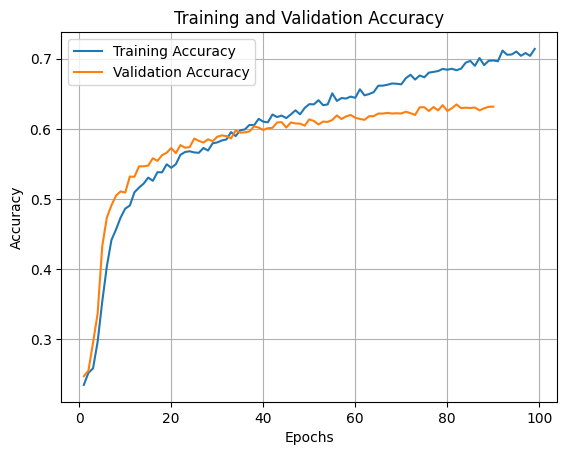

In [26]:
import matplotlib.pyplot as plt

# Define the values based on the provided log
accuracy_values = [0.2346, 0.2519, 0.2582, 0.2962, 0.3533, 0.4036, 0.4413, 0.4564, 0.4735, 0.4862, 0.4905, 0.5094, 0.5162, 0.5218, 0.5304, 0.5258, 0.5381, 0.5379, 0.5494, 0.5444, 0.5495, 0.5629, 0.5669, 0.5680, 0.5663, 0.5658, 0.5727, 0.5690, 0.5794, 0.5806, 0.5834, 0.5849, 0.5953, 0.5896, 0.5980, 0.5991, 0.6056, 0.6051, 0.6142, 0.6102, 0.6093, 0.6204, 0.6168, 0.6189, 0.6153, 0.6206, 0.6264, 0.6207, 0.6297, 0.6352, 0.6349, 0.6408, 0.6338, 0.6348, 0.6507, 0.6398, 0.6439, 0.6432, 0.6460, 0.6442, 0.6564, 0.6478, 0.6496, 0.6524, 0.6615, 0.6616, 0.6629, 0.6647, 0.6643, 0.6635, 0.6723, 0.6771, 0.6703, 0.6761, 0.6735, 0.6802, 0.6812, 0.6824, 0.6855, 0.6843, 0.6857, 0.6836, 0.6859, 0.6944, 0.6969, 0.6899, 0.7010, 0.6909, 0.6971, 0.6975, 0.6964, 0.7116, 0.7057, 0.7061, 0.7103, 0.7042, 0.7081, 0.7041, 0.7140]
val_accuracy_values = [0.2471, 0.2549, 0.2949, 0.3364, 0.4323, 0.4733, 0.4907, 0.5047, 0.5107, 0.5091, 0.5319, 0.5316, 0.5465, 0.5465, 0.5476, 0.5580, 0.5543, 0.5623, 0.5659, 0.5726, 0.5653, 0.5768, 0.5731, 0.5738, 0.5861, 0.5828, 0.5804, 0.5850, 0.5823, 0.5887, 0.5906, 0.5896, 0.5864, 0.5977, 0.5945, 0.5950, 0.5963, 0.6035, 0.6018, 0.5984, 0.6009, 0.6014, 0.6091, 0.6095, 0.6018, 0.6091, 0.6077, 0.6074, 0.6045, 0.6135, 0.6112, 0.6062, 0.6103, 0.6099, 0.6127, 0.6191, 0.6140, 0.6177, 0.6198, 0.6158, 0.6141, 0.6128, 0.6180, 0.6180, 0.6218, 0.6218, 0.6227, 0.6218, 0.6222, 0.6219, 0.6244, 0.6223, 0.6198, 0.6307, 0.6308, 0.6254, 0.6311, 0.6263, 0.6338, 0.6255, 0.6294, 0.6348, 0.6295, 0.6302, 0.6297, 0.6304, 0.6263, 0.6293, 0.6314, 0.6316]

# Plotting the accuracy
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, label='Training Accuracy')

# Plotting the validation accuracy
plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Path to the image
image_path = r'C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test\sad\PrivateTest_568359.jpg'
print("Original image is of sad")

# Preprocess the image
img = ef(image_path)

# Make predictions using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Predicted emotion:", pred_label)

Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted emotion: sad


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model prediction is sad


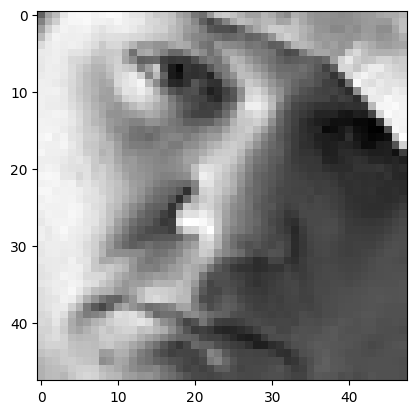

In [23]:
import matplotlib.pyplot as plt

image_path = r'C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test\sad\PrivateTest_1942677.jpg'
print("Original image is of sad")

# Preprocess the image
img = ef(image_path)

# Make predictions using the model
pred = model.predict(img)
pred_label = label[pred.argmax()]

print("Model prediction is", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.show()

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model prediction is  sad


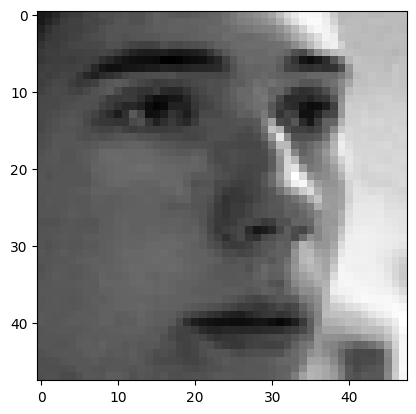

In [25]:
image = r'C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test\fear\PrivateTest_2178829.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
model prediction is  disgust


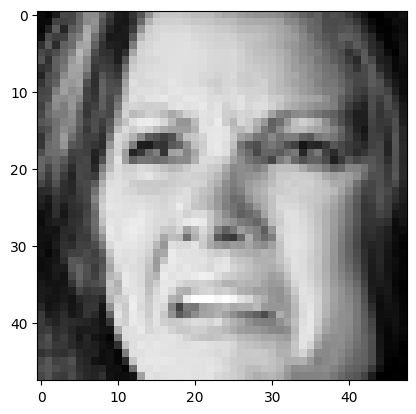

In [27]:
image = r'C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test\disgust\PrivateTest_4783181.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
model prediction is  happy


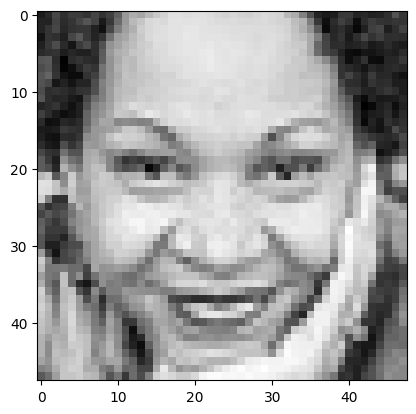

In [28]:
image = r'C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test\happy\PrivateTest_1533232.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  surprise


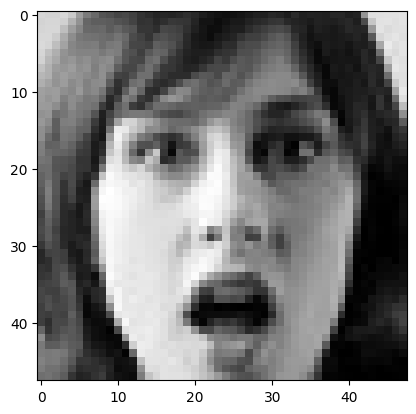

In [29]:
image = r'C:\Users\vinay\OneDrive\Desktop\human emotion detection\archive\test\surprise\PrivateTest_2034433.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')